In [24]:
import os
import pickle

import networkx as nx
from tqdm import tqdm

import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.io_utils as io_utils
import matching.glema.common.utils.plot_utils as plot_utils
from matching.glema.common.dataset import BaseDataset

In [25]:
args = arg_utils.parse_args( use_default=True )
model_ckpt = f"{args.ckpt_dir}/CPG_undirected/best_model.pt"
args = arg_utils.load_args( args, model_ckpt )
args.ckpt = model_ckpt
#args.embedding_dim = 6
#args.directed = True
args.dataset = "CPG_augm"
args.test_data = True

In [26]:
data_path = io_utils.get_abs_file_path( os.path.join( args.data_processed_dir, args.dataset ) )
if args.directed:
    data_path += "_directed"

data_path

'/Users/jeanjour/Documents/projects/python/dpd-subgraph-matching/matching/glema/data/data_processed/CPG_augm'

In [27]:
key_file = os.path.join( data_path, args.test_keys if args.test_data else args.train_keys )
with open( key_file, "rb" ) as fp:
    keys = pickle.load( fp )
print( f"Number of test data: {len( keys )}" )

Number of test data: 11648


In [28]:
dataset = BaseDataset( keys, args )

In [29]:
sample_idx = 33
sample_data = dataset.get_data( sample_idx )
query, source, mapping = sample_data
mapping = { qnid: snid for qnid, snid in mapping }
query = nx.relabel_nodes( query, mapping )

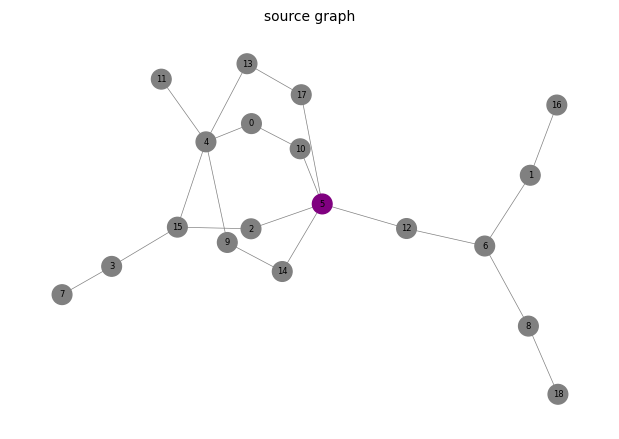

In [30]:
source_colors = [ "purple" if d[ "anchor" ] == 1 else "grey" for n, d in source.nodes( data=True ) ]
plot_utils.plot_graph( title="source graph", graph=source, nodeColors=source_colors )

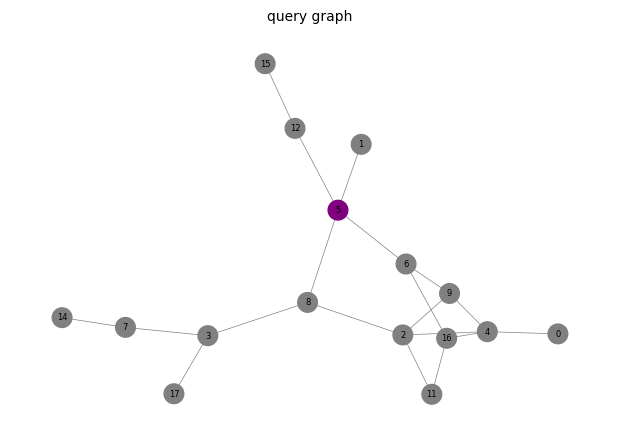

In [31]:
query_colors = [ "purple" if d[ "anchor" ] == 1 else "grey" for n, d in query.nodes( data=True ) ]
plot_utils.plot_graph( title="query graph", graph=query, nodeColors=query_colors )

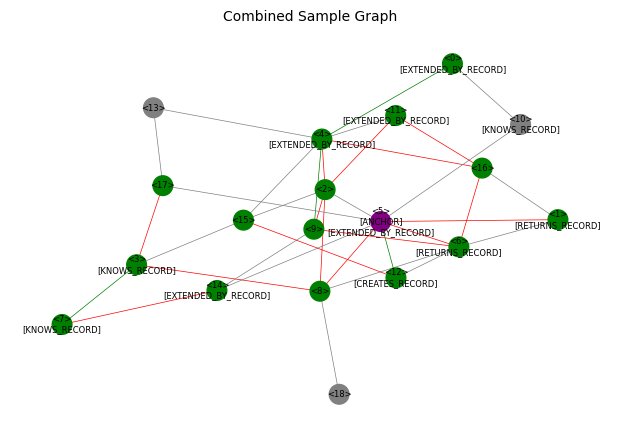

In [32]:
matching_colors = {
    2: "purple",
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = graph_utils.combine_graph( source, query,
                                                                matching_colors=matching_colors )
plot_utils.plot_graph(
    title="Combined Sample Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=graph_utils.get_node_labels( combined )
)

In [33]:
sample_tensors = dataset.__getitem__( sample_idx )
sample_tensors

{'H': array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 

In [34]:
sources_with_anchor = 0
queries_with_anchor = 0
samples_with_same_anchor = 0
for sample_idx in tqdm( list( range( len( keys ) ) ) ):
    sample_data = dataset.get_data( sample_idx )
    query, source, mapping = sample_data
    mapping = { qnid: snid for qnid, snid in mapping }

    source_anchor = graph_utils.get_anchor( source )
    if source_anchor >= 0:
        sources_with_anchor += 1
    query_anchor = graph_utils.get_anchor( query )
    if query_anchor >= 0:
        queries_with_anchor += 1
    if query_anchor in mapping and mapping[query_anchor] == source_anchor:
        samples_with_same_anchor += 1

print( f"Sources with anchor: {sources_with_anchor}/{len( keys )}" )
print( f"Queries with anchor: {queries_with_anchor}/{len( keys )}" )  
print( f"Samples with same anchor: {samples_with_same_anchor}/{len( keys )}" )  

100%|██████████| 11648/11648 [00:00<00:00, 25804.52it/s]

Sources with anchor: 11648/11648
Queries with anchor: 11648/11648
Samples with same anchor: 6515/11648
